In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class RegresTree():
    def __init__(self, max_lel=3):
      self.max_lvl = max_lel
      self.c = []

    def regres_crit(self, X, y, condition):
        index1 = (X < condition)
        index2 = (X >= condition)
        if index1.sum() == 0:
          DU0 = 0
        else:
          DU0 = np.power(y[index1] - y[index1].sum() / index1.sum(), 2).sum() / index1.sum()
        if index2.sum() == 0:
          DU1 = 0
        else:
          DU1 = np.power(y[index2] - y[index2].sum() / index2.sum(), 2).sum() / index2.sum()
        return DU0 * index1.sum() / len(y) + DU1 * index2.sum() / len(y)

    def get_conditions(self, X, y):
        cond = np.linspace(X.min(), X.max(), 10)
        return cond[np.argmin([self.regres_crit(X, y, i) for i in cond])]
    
    def decision_tree_step(self, X, y, depth=0):
      if depth == self.max_lvl:
        return {'target' : y.mean()}
      try:
        condition = self.get_conditions(X, y)
        self.c.append(y.mean())
        left_index = X < condition
        right_index = X >= condition
        

        return { 
            'level' : depth,
            'split' :  condition,
            'target' : y.mean(),
            'left_node' : self.decision_tree_step(X[left_index], y[left_index], depth + 1),
            'right_node' : self.decision_tree_step(X[right_index], y[right_index], depth + 1)
        }
      except:
        return {'target' : y.mean()}

    def fit(self, X, y):
      self.tree = self.decision_tree_step(X, y)
      return self.tree

    def predict_one(self, x):
      next = self.tree
      while 'split' in next:
        if x >= next['split']:
          next = next['right_node']
        else:
          next = next['left_node']
      return next['target']
      
    def predict(self, X):
      return [self.predict_one(i) for i in X]

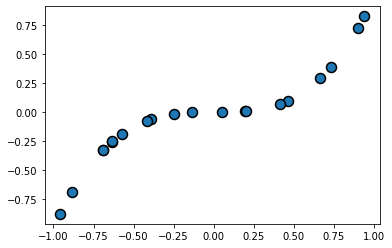

In [ ]:
np.random.seed(42)
X_train = np.random.uniform(size=(1, 20), low=-1, high=1)
y_train = np.array(list(map(lambda x : x**3, X_train[0])))

plt.scatter(X_train, y_train, 
            s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.show()

In [ ]:
RegTree = RegresTree()
regtree = RegTree.fit(X_train[0], y_train)
y_predict = RegTree.predict(X_train[0])

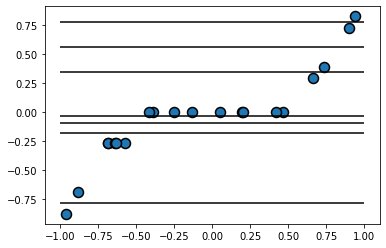

In [ ]:
for i in RegTree.c:
  plt.hlines(i, -1, 1)
plt.scatter(X_train[0], y_predict, 
            s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.show()